<a href="https://colab.research.google.com/github/aqsa123-dotcom/SMS-SPAM-checker/blob/main/SSDMLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!import numpy as np # linear algebra
import pandas as pd
df = pd.read_csv('/content/spam.csv', encoding='latin1')


In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()
df.isnull().sum()
df.duplicated().sum()
df = df.drop_duplicates(keep="first")
df.shape

(5169, 2)

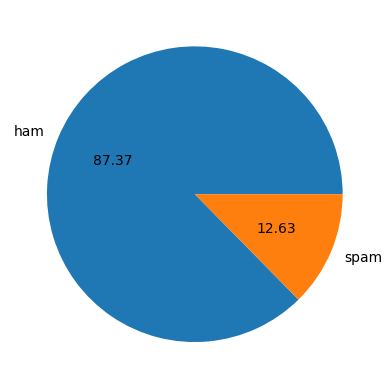

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<Axes: xlabel='characters', ylabel='Count'>

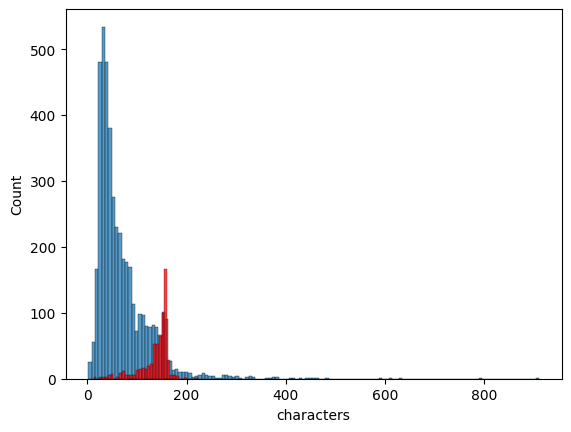

In [ ]:
import nltk
nltk.download('punkt')
df['characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df[['num_words', 'characters', 'num_sentences']].describe()
df[df['target']==0][['num_words', 'characters', 'num_sentences']].describe()
import seaborn as sns
sns.histplot(df[df['target'] == 0]['characters'])
sns.histplot(df[df['target'] == 1]['characters'], color='red')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text ):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text.clear()
    text = []
    for i in y:
        text.append(ps.stem(i))
    return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(df)

      target                                               text  characters  \
0          0  Go until jurong point, crazy.. Available only ...         111   
1          0                      Ok lar... Joking wif u oni...          29   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...         155   
3          0  U dun say so early hor... U c already then say...          49   
4          0  Nah I don't think he goes to usf, he lives aro...          61   
...      ...                                                ...         ...   
5567       1  This is the 2nd time we have tried 2 contact u...         161   
5568       0              Will Ì_ b going to esplanade fr home?          37   
5569       0  Pity, * was in mood for that. So...any other s...          57   
5570       0  The guy did some bitching but I acted like i'd...         125   
5571       0                         Rofl. Its true to its name          26   

      num_words  num_sentences  
0            24   

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)
print(df)

      target                                               text  characters  \
0          0  Go until jurong point, crazy.. Available only ...         111   
1          0                      Ok lar... Joking wif u oni...          29   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...         155   
3          0  U dun say so early hor... U c already then say...          49   
4          0  Nah I don't think he goes to usf, he lives aro...          61   
...      ...                                                ...         ...   
5567       1  This is the 2nd time we have tried 2 contact u...         161   
5568       0              Will Ì_ b going to esplanade fr home?          37   
5569       0  Pity, * was in mood for that. So...any other s...          57   
5570       0  The guy did some bitching but I acted like i'd...         125   
5571       0                         Rofl. Its true to its name          26   

      num_words  num_sentences  \
0            24  

In [ ]:
# Convert list of tokens to a single string
df['transformed_text'] = df['transformed_text'].apply(lambda x: ' '.join(x))

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit and transform the data
X = tfidf.fit_transform(df['transformed_text']).toarray()

# Save the TfidfVectorizer to a file using pickle
vectorizer_filename = '/content/tfidf_vectorizer.pkl'
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(tfidf, file)

# Extract target values
y = df['target'].values


In [ ]:
print(X.shape)
print(y.shape)

(5169, 6708)
(5169,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score, f1_score
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc
}
def train_classifier(clf, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy, precision, recall, f1

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision,current_recall,current_F1 = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("F1 score - ",current_F1)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_F1)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
Recall -  0.8188405797101449
F1 score -  0.889763779527559
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
Recall -  0.2536231884057971
F1 score -  0.4046242774566474
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
Recall -  0.6956521739130435
F1 score -  0.8205128205128205
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
Recall -  0.6376811594202898
F1 score -  0.7272727272727273
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
Recall -  0.6811594202898551
F1 score -  0.7899159663865546
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
Recall -  0.7898550724637681
F1 score -  0.8825910931174089


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
Recall -  0.7536231884057971
F1 score -  0.8387096774193549


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'F1-Measure':f1_scores}).sort_values('Precision',ascending=False)

In [ ]:
print(performance_df)

  Algorithm  Accuracy  Precision    Recall  F1-Measure
1        KN  0.900387   1.000000  0.253623    0.404624
2        NB  0.959381   1.000000  0.695652    0.820513
5        RF  0.971954   1.000000  0.789855    0.882591
0       SVC  0.972921   0.974138  0.818841    0.889764
6  AdaBoost  0.961315   0.945455  0.753623    0.838710
4        LR  0.951644   0.940000  0.681159    0.789916
3        DT  0.936170   0.846154  0.637681    0.727273


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Train and De
# Train the classifier
rfc.fit(X_train, y_train)
vectorizer_filename = '/content/TrainedRandomForest.pkl'
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(rfc, file)
